# 03. DNN(Deep Neural Network)실습
---

**목차**
> * 실습
  * 데이터
    1. 데이터 불러오기
    2. 데이터 분포 시각화
    3. 데이터 전처리
    4. 테스트셋 분리
  * 모델
    1. 모델 구현
    2. 학습
  * 성능평가
    1. Softmax regression
    2. DNN
* 과제


```
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
```





In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **실습**

---
### **데이터**
---


![](https://t1.daumcdn.net/tistoryfile/fs13/27_tistory_2009_11_29_22_54_4b127d29159f6?x-content-disposition=inline)

`Iris` 데이터셋

* caseno: 일련번호 (1부터 150)  
* Sepal Length: 꽃받침의 길이 
* Sepal Width: 꽃받침의 너비  
* Petal Length: 꽃잎의 길이  
* Petal Width: 꽃잎의 너비    
* Species: 꽃의 종류 .  
* Label: setosa / versicolor / virginica 의 3종류




#### **(1) 데이터 불러오기**

* `sklearn`의 `datasets` 에서 `iris` 데이터셋 불러오기

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

* iris 데이터를 x, y 로 분류하기

In [6]:
X,Y  = iris['data'],iris['target']
X.shape,Y.shape

((150, 4), (150,))

#### **(2) 데이터 분포 시각화**

* X 데이터

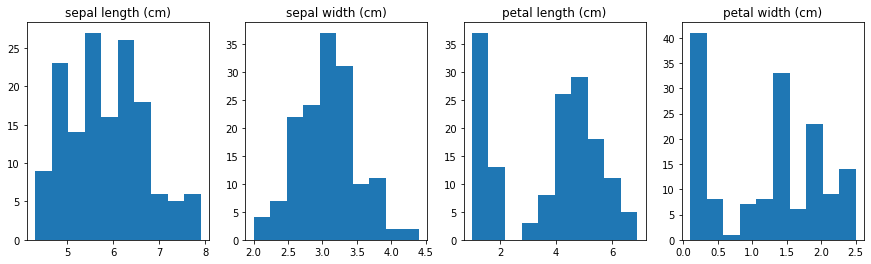

In [11]:
plt.figure(figsize = (15,4))

for i in range(4):
  plt.subplot(1,4,i+1)
  plt.title(iris['feature_names'][i])
  plt.hist(X[:,i])
plt.show()


* Y 데이터

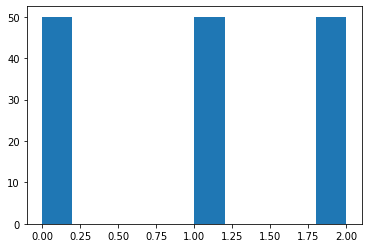

In [13]:
plt.hist(Y)
plt.show()

####  **(3) 데이터 전처리**

* z-score 정규화

In [14]:
#(x-x.mean)/x.std
for i in range(4):
  x= X[:,i]
  X[:,i] = (x-np.mean(x))/np.std(x)

* 분포 확인

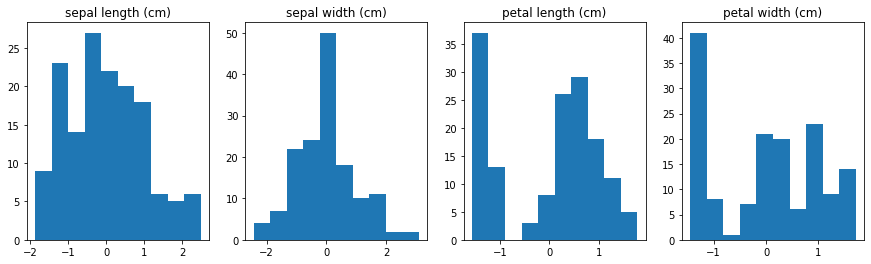

In [15]:
plt.figure(figsize = (15,4))

for i in range(4):
  plt.subplot(1,4,i+1)
  plt.title(iris['feature_names'][i])
  plt.hist(X[:,i])
plt.show()

####  **(4) 테스트셋 분리**

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2 , shuffle=True, random_state=1)
x_train.shape , x_test.shape ,y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [48]:
y_train.shape

(120,)

---
### **모델**
---

딥러닝 모델 구성과 학습과정은 크게 세가지로 나뉩니다.

* 모델 구현 : 원하는 레이어를 이용해 모델을 만듭니다.
* 컴파일: 학습전 적절한 손실함수와 적절한 옵티마이저를 정의해 줍니다.
* 학습: 학습을 진행합니다.

#### **(1) 모델구현**

In [33]:
from tensorflow.keras import models, layers, optimizers

* **Softmax regression**

In [60]:
x = layers.Input(shape=(4,))
y = layers.Dense(3, activation='softmax')(x)

sr = models.Model(x,y,name='SoftMaxRegression')
sr.summary()

Model: "SoftMaxRegression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_12 (Dense)            (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


* **DNN**

In [61]:
x = layers.Input(shape=(4,))
z = layers.Dense(8,activation='relu')(x)
y = layers.Dense(3, activation='softmax')(z)

dnn= models.Model(x,y,name='DNN')
dnn.summary()

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_13 (Dense)            (None, 8)                 40        
                                                                 
 dense_14 (Dense)            (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


#### **(2) 컴파일**


* **Softmax Regression**

In [62]:
#세가지 이상의 클래스 분류 문제 - > 크로스엔트로피
#옵티마이져: sgd (문제종류 상관없음)
sr.compile(loss = 'sparse_categorical_crossentropy',
           optimizer='sgd',
           metrics=['acc']
           )

* **DNN**

In [66]:
dnn.compile(loss = 'sparse_categorical_crossentropy',
           optimizer='sgd',
            metrics=['acc']
            )

#### **(3) 학습**


* **Softmax Regression**

In [67]:
#epochs : 학습횟수
#batch size: 한번에 업데이트 할 개수 
history_sr = sr.fit(x_train,y_train,epochs=5, batch_size= 1)

Epoch 1/5
120/120 [==============================] - 1s 7ms/step - loss: 0.3980 - acc: 0.8500
Epoch 2/5
120/120 [==============================] - 1s 6ms/step - loss: 0.3780 - acc: 0.8500
Epoch 3/5
120/120 [==============================] - 1s 6ms/step - loss: 0.3617 - acc: 0.8583
Epoch 4/5
120/120 [==============================] - 1s 7ms/step - loss: 0.3472 - acc: 0.8583
Epoch 5/5
120/120 [==============================] - 1s 5ms/step - loss: 0.3344 - acc: 0.8750


* **DNN**

In [68]:
history_dnn = dnn.fit(x_train,y_train,epochs=5, batch_size= 1)

Epoch 1/5
120/120 [==============================] - 2s 6ms/step - loss: 1.0195 - acc: 0.4750
Epoch 2/5
120/120 [==============================] - 1s 5ms/step - loss: 0.7535 - acc: 0.6750
Epoch 3/5
120/120 [==============================] - 1s 6ms/step - loss: 0.5661 - acc: 0.7417
Epoch 4/5
120/120 [==============================] - 1s 5ms/step - loss: 0.4683 - acc: 0.8083
Epoch 5/5
120/120 [==============================] - 1s 6ms/step - loss: 0.4136 - acc: 0.8083


---
### **성능평가**
---

* 혼돈행렬 플롯

In [92]:
from sklearn import metrics
def plot_cm(model,x_test,y_test):
  y_pred = model.predict(x_test)
  print(y_pred.shape)
  m = metrics.confusion_matrix(y_test,np.argmax(y_pred,axis=1))
  print(m)
  sns.heatmap(m,annot=True)
  plt.show()

* 학습 커브 플롯

In [91]:
def plot_lcurve(history): 
  acc_plot = history.history['acc']
  loss_plot = history.history['loss']

  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  acc_ax.plot(acc_plot, c = 'orangered',label='Acc',marker='.')
  loss_ax.plot(loss_plot, c= 'dodgerblue', label='Loss',marker='.')

  acc_ax.set_ylabel("accuracy")
  loss_ax.set_ylabel('loss')
  acc_ax.legend(loc='upper center')
  loss_ax.legend()
  plt.show()

#### **(1) Softmax Regression**

* 최종 `loss` 와 `acc`

In [85]:
sr.evaluate(x_test,y_test)

1/1 [==============================] - 0s 282ms/step - loss: 0.3827 - acc: 0.7667


[0.38267281651496887, 0.7666666507720947]

* 예측

In [88]:
y_pred = sr.predict(x_test)
y_pred.shape

(30, 3)

* 혼돈행렬

(30, 3)
[[11  0  0]
 [ 0  6  7]
 [ 0  0  6]]


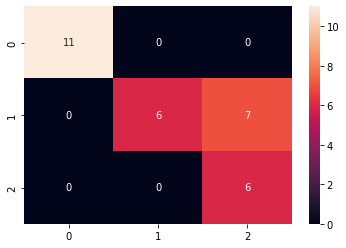

In [93]:
plot_cm(sr,x_test,y_test)

* 학습과정 시각화

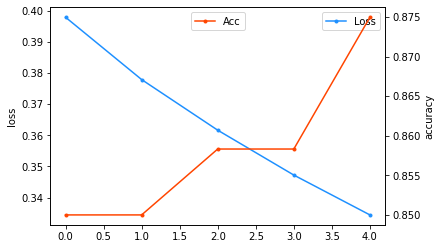

In [94]:
plot_lcurve(history_sr)

#### **(2) DNN**

* 최종 `loss` 와 `acc`

In [95]:
dnn.evaluate(x_test,y_test)

1/1 [==============================] - 0s 236ms/step - loss: 0.4657 - acc: 0.7333


[0.4657462537288666, 0.7333333492279053]

* 예측

In [96]:
y_pred = dnn.predict(x_test)

* 혼돈행렬

(30, 3)
[[11  0  0]
 [ 0  5  8]
 [ 0  0  6]]


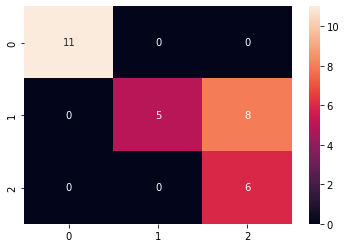

In [97]:
plot_cm(dnn,x_test,y_test)

* 학습과정 시각화

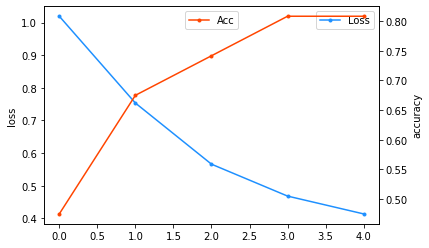

In [98]:
plot_lcurve(history_dnn)

## **과제**


---
### **과제01**
---

위에서 만든 DNN 모델을 변형하여 성능을 올려 보세요.
* 모델 구조를 변경해보세요(레이어 추가 혹은 가중치 차원 증가)
* 훈련시 옵티마이저를 바꿔보세요
* 훈련시 학습회수와 배치사이즈를 조정해보세요

In [126]:
x = layers.Input(shape=(4,))
y = layers.Dense(3, activation='softmax')(x)

sr = models.Model(x,y,name='SoftMaxRegression')
sr.summary()
x = layers.Input(shape=(4,))
z = layers.Dense(8,activation='relu')(x)
y = layers.Dense(3, activation='softmax')(z)

dnn= models.Model(x,y,name='DNN')
dnn.summary()

sr.compile(loss = 'sparse_categorical_crossentropy',
           optimizer='adam',
           metrics=['acc']
           )
dnn.compile(loss = 'sparse_categorical_crossentropy',
           optimizer='adam',
            metrics=['acc']
            )



Model: "SoftMaxRegression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_27 (Dense)            (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_28 (Dense)            (None, 8)                 40        
                                                                 
 dense_29 (Dense)            (None, 3)  

In [133]:
history_sr = sr.fit(x_train,y_train,epochs=10, batch_size= 2)
history_dnn = dnn.fit(x_train,y_train,epochs=10, batch_size= 2)



Epoch 1/10
60/60 [==============================] - 1s 4ms/step - loss: 0.5532 - acc: 0.8000
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 0.5304 - acc: 0.8083
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 0.5114 - acc: 0.8250
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.4949 - acc: 0.8250
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.4799 - acc: 0.8250
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.4669 - acc: 0.8417
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.4549 - acc: 0.8417
Epoch 8/10
60/60 [==============================] - 0s 4ms/step - loss: 0.4442 - acc: 0.8417
Epoch 9/10
60/60 [==============================] - 0s 4ms/step - loss: 0.4342 - acc: 0.8417
Epoch 10/10
60/60 [==============================] - 0s 4ms/step - loss: 0.4255 - acc: 0.8417
Epoch 1/10
60/60 [==============================] - 1s 5ms/step - los

* 소프트맥스 Rregression

In [134]:
sr.evaluate(x_test,y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.5197 - acc: 0.7333


[0.5197328329086304, 0.7333333492279053]

In [130]:
y_pred = sr.predict(x_test)
y_pred.shape

(30, 3)

(30, 3)
[[11  0  0]
 [ 0  6  7]
 [ 0  1  5]]


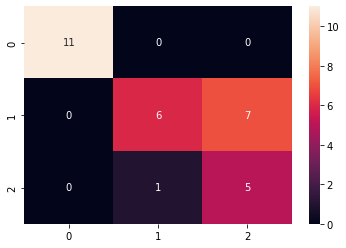

In [135]:
plot_cm(sr,x_test,y_test)

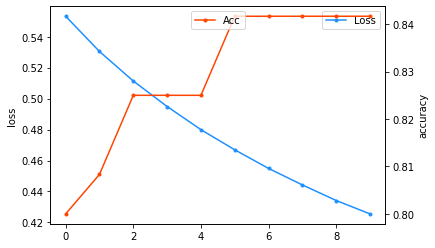

In [136]:
plot_lcurve(history_sr)

* DNN

In [137]:
dnn.evaluate(x_test,y_test)

1/1 [==============================] - 0s 147ms/step - loss: 0.2635 - acc: 0.9000


[0.26346758008003235, 0.8999999761581421]

In [138]:
y_pred = dnn.predict(x_test)

(30, 3)
[[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]


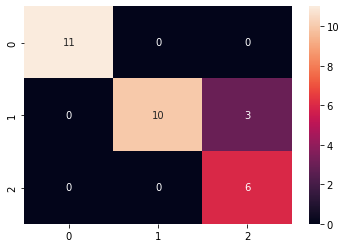

In [139]:
plot_cm(dnn,x_test,y_test)

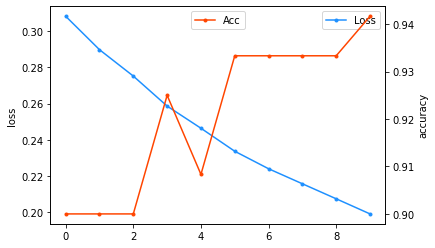

In [140]:
plot_lcurve(history_dnn)

---
### **과제02**
---

`Pandas` 데이터셋의  `penguins`를 사용합니다. DNN을 이용해 펭귄의 종을 예측해 보세요 

In [151]:
import seaborn as sns
import pandas
df_pre = sns.load_dataset("penguins")

* 전처리

In [152]:
def preprocess_penguins(df_pre):

  #범주형 수치화(성별,섬,종)
  mask_m = df_pre["sex"] =='Male'
  mask_f = df_pre["sex"] =='Female'
  df_pre.loc[mask_m, "sex"] =0
  df_pre.loc[mask_f, "sex"] =1

  mask_i_t = df_pre["island"] =='Torgersen'
  mask_i_b = df_pre["island"] =='Biscoe'
  mask_i_d = df_pre["island"] =='Dream'
  df_pre.loc[mask_i_t, "island"] =0
  df_pre.loc[mask_i_b, "island"] =1
  df_pre.loc[mask_i_d, "island"] =2

  mask_s_a = df_pre["species"] =='Adelie' 
  mask_s_c = df_pre["species"] =='Chinstrap'
  mask_s_g = df_pre["species"] =='Gentoo'
  df_pre.loc[mask_s_a, "species"] =0
  df_pre.loc[mask_s_c, "species"] =1
  df_pre.loc[mask_s_g, "species"] =2
  
  #min-max정규화
  for col in ['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']:
    df_pre[col] = (df_pre[col]-df_pre[col].min())/(df_pre[col].max()-df_pre[col].min())
  #(object->int)
  
  #결측값 줄삭제
  df_pre = df_pre.dropna(axis=0)
  return df_pre

In [182]:
train=preprocess_penguins(df_pre)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


* X Y

In [191]:
df=train.to_numpy()
X = np.array(df[:, 1:],dtype ='float')
Y = np.array(df[:, 0],dtype='int')
print(X.shape,Y.shape)

(333, 6) (333,)


In [192]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

* 테스트 셋 분리

In [193]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2 , shuffle=True, random_state=1)
x_train.shape , x_test.shape ,y_train.shape, y_test.shape

((266, 6), (67, 6), (266,), (67,))

In [194]:
x = layers.Input(shape=(6,))
y = layers.Dense(5, activation='softmax')(x)

sr = models.Model(x,y,name='SoftMaxRegression')
sr.summary()

Model: "SoftMaxRegression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 6)]               0         
                                                                 
 dense_43 (Dense)            (None, 5)                 35        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [205]:
x = layers.Input(shape=(6,))
z = layers.Dense(12,activation='relu')(x)
y = layers.Dense(5, activation='softmax')(z)

dnn= models.Model(x,y,name='DNN')
dnn.summary()

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 6)]               0         
                                                                 
 dense_46 (Dense)            (None, 12)                84        
                                                                 
 dense_47 (Dense)            (None, 5)                 65        
                                                                 
Total params: 149
Trainable params: 149
Non-trainable params: 0
_________________________________________________________________


In [206]:
sr.compile(loss = 'sparse_categorical_crossentropy',
           optimizer='sgd',
           metrics=['acc']
           )

In [207]:
dnn.compile(loss = 'sparse_categorical_crossentropy',
           optimizer='sgd',
           metrics=['acc']
           )

In [208]:
x_train.shape,y_train.shape

((266, 6), (266,))

* 학습

In [220]:
history_sr = sr.fit(x_train,y_train,epochs=10, batch_size= 8)

Epoch 1/10
34/34 [==============================] - 0s 4ms/step - loss: 0.1761 - acc: 0.9962
Epoch 2/10
34/34 [==============================] - 0s 4ms/step - loss: 0.1759 - acc: 0.9962
Epoch 3/10
34/34 [==============================] - 0s 4ms/step - loss: 0.1755 - acc: 1.0000
Epoch 4/10
34/34 [==============================] - 0s 5ms/step - loss: 0.1752 - acc: 0.9962
Epoch 5/10
34/34 [==============================] - 0s 4ms/step - loss: 0.1749 - acc: 0.9962
Epoch 6/10
34/34 [==============================] - 0s 6ms/step - loss: 0.1747 - acc: 0.9962
Epoch 7/10
34/34 [==============================] - 0s 4ms/step - loss: 0.1744 - acc: 0.9962
Epoch 8/10
34/34 [==============================] - 0s 5ms/step - loss: 0.1740 - acc: 0.9925
Epoch 9/10
34/34 [==============================] - 0s 4ms/step - loss: 0.1737 - acc: 0.9962
Epoch 10/10
34/34 [==============================] - 0s 4ms/step - loss: 0.1734 - acc: 0.9962


In [221]:
history_dnn = dnn.fit(x_train,y_train,epochs=10, batch_size= 8)

Epoch 1/10
34/34 [==============================] - 0s 4ms/step - loss: 0.0520 - acc: 0.9962
Epoch 2/10
34/34 [==============================] - 0s 4ms/step - loss: 0.0522 - acc: 0.9962
Epoch 3/10
34/34 [==============================] - 0s 4ms/step - loss: 0.0519 - acc: 0.9962
Epoch 4/10
34/34 [==============================] - 0s 4ms/step - loss: 0.0513 - acc: 0.9962
Epoch 5/10
34/34 [==============================] - 0s 5ms/step - loss: 0.0507 - acc: 1.0000
Epoch 6/10
34/34 [==============================] - 0s 5ms/step - loss: 0.0506 - acc: 0.9962
Epoch 7/10
34/34 [==============================] - 0s 5ms/step - loss: 0.0504 - acc: 0.9962
Epoch 8/10
34/34 [==============================] - 0s 6ms/step - loss: 0.0497 - acc: 1.0000
Epoch 9/10
34/34 [==============================] - 0s 5ms/step - loss: 0.0497 - acc: 0.9962
Epoch 10/10
34/34 [==============================] - 0s 5ms/step - loss: 0.0491 - acc: 0.9962


* 성능평가

In [222]:
from sklearn import metrics
def plot_cm(model,x_test,y_test):
  y_pred = model.predict(x_test)
  print(y_pred.shape)
  m = metrics.confusion_matrix(y_test,np.argmax(y_pred,axis=1))
  print(m)
  sns.heatmap(m,annot=True)
  plt.show()

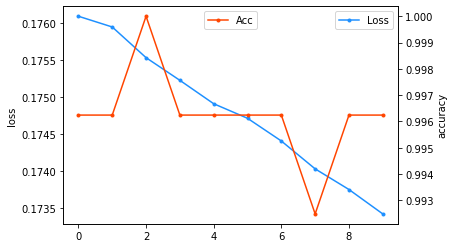

In [223]:
plot_lcurve(history_sr)

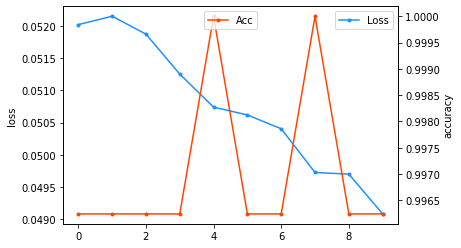

In [224]:
plot_lcurve(history_dnn)